# **Lesson_4.1**

## In this lecture

* Fork repository, update or recreate codespace

* Pandas: data handling (introduction and essentials)
* In-class exercise
* Pandas visualisation

---

## Pandas Series and DataFrame*

<p align="center">
	<img src="../assets/img/pandas_series_dataframe.jpg" width="700">
</p>

#### In Data Science, Pandas handles data in Series and DataFrames.

* A Pandas Series is similar to a NumPy array: A grid of values that contain data (numerical, categorical, date, boolean etc.)
* A key difference is that a Series can be indexed by a label, either number or category.

#### There are multiple ways to create a **Pandas Series**

You can create a Pandas Series using `pd.Series()` based on a Python list. The argument is dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categories = ['a', 'b', 'c']
my_list = [11, 22, 33]

In [3]:
ser = pd.Series(data = my_list, index = categories)
ser

a    11
b    22
c    33
dtype: int64

#### Pandas **DataFrame**

**DataFrames** are the basis of Pandas.

* A dataframe is a set of Series put together to share the same index.
* Think of DataFrames as an Excel, or data table in JavaScript
* Typically the nomenclature for a Pandas DataFrame is **df**
* To create a DataFrame, use `pd.DataFrame()`. Consider the DataFrame below created based on the following arguments:
	* data are an array.
	* index is a list A to E
	* columns a list Col1 to Col4


In [4]:
np.random.seed(42)
df = pd.DataFrame(data=np.random.randn(5,4),
                  index=['A', 'B', 'C', 'D', 'E'],
                  columns=['Col1', 'Col2', 'Col3', 'Col4']
                  )

In [5]:
df

,Col1,Col2,Col3,Col4
A,0.496714,-0.138264,0.647689,1.523030
B,-0.234153,-0.234137,1.579213,0.767435
C,-0.469474,0.542560,-0.463418,-0.465730
D,0.241962,-1.913280,-1.724918,-0.562288
E,-1.012831,0.314247,-0.908024,-1.412304


### How to Filter, Add and Drop DataFrame Columns

In [6]:
df['Col1']

A    0.496714
B   -0.234153
C   -0.469474
D    0.241962
E   -1.012831
Name: Col1, dtype: float64

In [7]:
df[['Col1', 'Col2']]
     

,Col1,Col2
A,0.496714,-0.138264
B,-0.234153,-0.234137
C,-0.469474,0.542560
D,0.241962,-1.913280
E,-1.012831,0.314247


In [8]:
df.filter(['Col1'])

,Col1
A,0.496714
B,-0.234153
C,-0.469474
D,0.241962
E,-1.012831


In [9]:
df1 = df.copy()

In [10]:
df1

,Col1,Col2,Col3,Col4
A,0.496714,-0.138264,0.647689,1.523030
B,-0.234153,-0.234137,1.579213,0.767435
C,-0.469474,0.542560,-0.463418,-0.465730
D,0.241962,-1.913280,-1.724918,-0.562288
E,-1.012831,0.314247,-0.908024,-1.412304


In [11]:
df1['Col5'] = df['Col1']

In [12]:
df1

,Col1,Col2,Col3,Col4,Col5
A,0.496714,-0.138264,0.647689,1.523030,0.496714
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
D,0.241962,-1.913280,-1.724918,-0.562288,0.241962
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


In [13]:
df1.drop(labels=['A', 'D'], axis=0)

,Col1,Col2,Col3,Col4,Col5
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


In [14]:
df1

,Col1,Col2,Col3,Col4,Col5
A,0.496714,-0.138264,0.647689,1.523030,0.496714
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
D,0.241962,-1.913280,-1.724918,-0.562288,0.241962
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


In [16]:
df1.drop(labels=['A', 'D'], axis=0, inplace=True)

In [17]:
df1

,Col1,Col2,Col3,Col4,Col5
B,-0.234153,-0.234137,1.579213,0.767435,-0.234153
C,-0.469474,0.542560,-0.463418,-0.465730,-0.469474
E,-1.012831,0.314247,-0.908024,-1.412304,-1.012831


---

### `.groupby()`

In [18]:
data = {'Product':['Bread','Bread','Milk','Milk','Milk','Butter','Butter','Butter'],
        'Person':['Anna','Anna','Brian','John','John','Carl','Sarah','Anna'],
        'Sales':[200,120,340,124,243,350,500,240],
        'Quantity':[3,5,3,8,2,7,5,4],
        'Margin':[100,20,280,50,100,67,300,200]}

df = pd.DataFrame(data)
df

,Product,Person,Sales,Quantity,Margin
0,Bread,Anna,200,3,100
1,Bread,Anna,120,5,20
2,Milk,Brian,340,3,280
3,Milk,John,124,8,50
4,Milk,John,243,2,100
5,Butter,Carl,350,7,67
6,Butter,Sarah,500,5,300
7,Butter,Anna,240,4,200


In [ ]:
df.index

In [19]:
# df.groupby(['Product'])
df.groupby(by=['Product'])

In [25]:
by_group = df.groupby(by=['Product'])['Margin'].mean()
by_group.values

array([ 60.        , 189.        , 143.33333333])

---

## Index and Values

In [26]:
by_group.index

Index(['Bread', 'Butter', 'Milk'], dtype='str', name='Product')

In [27]:
by_group.values

array([ 60.        , 189.        , 143.33333333])

* The section is based on the Predictive Analytics module by the [Code Institute](https://codeinstitute.net/)

---

## In-class exercise: Pandas + Matplotlib

**Objective**:
* Import pandas

* Load a real CSV dataset
* Inspect the dataset
* Check and drop missing values (use `.dropna()` Pandas method)
* Group and summarise data accordingly
* Plot a vertical bar for selected categories chart using Matplotlib
* Bonus: plot same vertical bar using Plotly Express (you will need to run `reset_index()` method)

Choose ONE of the following common datasets:

[Iris dataset](https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv)

[Tips dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv)

[Titanic dataset](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

[Penguins dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


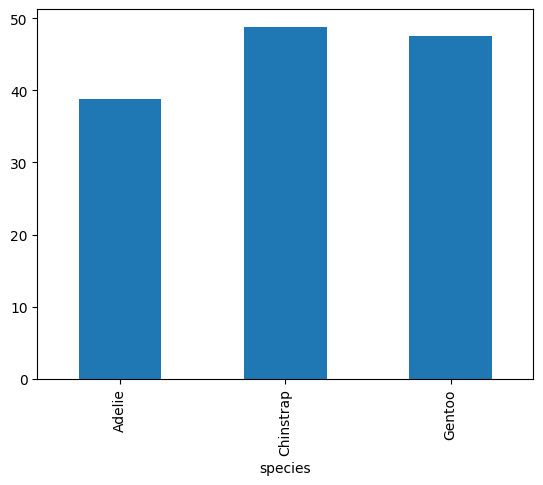

In [71]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
Dataset = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(Dataset)
df.dropna(inplace=True)
#by_species = df.groupby(by=['species'])['island']
by_bill_length = df.groupby(by=['species'])['bill_length_mm'].mean()
by_bill_depth = df.groupby(by=['species'])['bill_depth_mm'].mean()
by_flipper_length_mm = df.groupby(by=['species'])['flipper_length_mm'].mean()
#by_body_mass_g = df.groupby(by=['species'])['sex'].mean()


by_bill_length.plot(kind='bar')
df





In [53]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

---

## Pandas visualisation

***You will only start understanding your data objectively when you start visualising it***

* Pandas' has built-in methods/functions for visualising data that will help you to understand your data better

* Even though it is related to Pandas, we need to import matplotlib
* Pandas' capabilities/flexibilities for plotting can not be compared to Matplotlib, Seaborn or Plotly
* You typically use Pandas plotting capabilities for quick visualisations

### `.plot()`

You can use `.plot()` to visualise data in Pandas. The documentation is here

A relevant argument is **kind**, where you determine the kind of plot to produce. The options include:

* 'line': line plot (default)

* 'bar': vertical bar plot
* 'barh': horizontal bar plot
* 'hist': histogram
* 'box': boxplot
* 'kde': Kernel Density Estimation plot
* 'area': area plot
* 'pie': pie plot
* 'scatter': scatter plot

In [ ]:
df = sns.load_dataset('penguins')

In [ ]:
df = sns.load_dataset('penguins')
df = df.head(50)
df.head()

### Histogram (example)

* A histogram is effective in visualizing how numerical data is distributed. It groups values into bins and displays a count of the data points whose values are in a particular bin

* We are interested to see how body mass is distributed

* We set kind='hist', and y='body_mass_g'
* Bins value is more like a "trial and error" exercise; you may start with a number and refine until you have a good visualisation
* We also set figsize and title
* We may state that visually, the majority of the data is within the range of 3300 to 4500. There is a peak at around 4000. The data is not normally distributed (bell shape). A normal distribution is when data points tend to be around a central value with no bias to the left or the right. It's often termed a 'Bell Curve' because it looks like a bell

In [ ]:
df.plot(kind='hist', y='body_mass_g', bins=75, figsize=(10,6), title='body mass distribution')
plt.show()

* We can plot more than one distribution in one plot

* Imagine if we are interested to see the distribution of bill_length_mm and bill_depth_mm
* We notice the values don't overlap; they have different distribution shapes.

In [ ]:
df.plot(kind='hist', y=['bill_length_mm', 'bill_depth_mm'], bins=50, figsize=(10,6))
plt.show()

### Box Plot (example)

A boxplot graphs data based on their quartiles. The first, second and third quartile numbers divide the data into approximately equal-sized quarters. Boxplot is an approach to display the distribution of data based on five metrics that help to summarise a numerical distribution:
* minimum (min)
* first quartile (Q1)
* median
* third quartile (Q3)
* and maximum (max)


<p align="center">
	<img src="../assets/img/box_plot.jpg" width="500">
</p>

* The range between the first and third quartiles (Q1 - Q3), also known as the interquartile range (IQR), shows where your data is most frequent

* The min and max show your data range (these points may be an outlier or not). In the plot above, the min and max values are outliers
* The outliers are data points that are dramatically different from other data points
* The upper and lower boundaries, where the data is not an outlier, are Q3 + 1.5 x IQR and Q1 - 1.5 x IQR
* You can check how tightly your data is grouped; the "smaller" the box, the more "grouped" the data is (lower data variance).
* We will study in more detail these terms

In [ ]:
df = sns.load_dataset('iris')
df = df.head(50)
df.head()

In [ ]:
df.plot(kind='box',y=['sepal_width'],figsize=(10,7))
plt.show()

In [ ]:
df.plot(kind='box',y=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],figsize=(10,7))
plt.show()

* Let's plot the same information with histograms

In [ ]:
df.plot(kind='hist',bins=50 ,y=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
        figsize=(10,7),alpha=0.7)
plt.show()

The chapter is based on the Predictive Analytics module by [Code Institute](https://codeinstitute.net/)

### In-class exercise
Select one dataset from the list in of dataset above and plot hystogram and box plots of selected *numerical* features. Identify and drop N/A data, if necessary

---

### End of lesson routine